In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import warnings

# Import Dataset File


In [13]:
df = pd.read_csv(r'C:\Users\amitk\Downloads\customer_shopping_data.csv')

In [14]:
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


# Exploratory Data Analysis

In [15]:
#for data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [17]:
#it shows how many column and rows are there
df.shape

(99457, 10)

In [18]:
#its provide columns name
df.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [20]:
df.nunique()

invoice_no        99457
customer_id       99457
gender                2
age                  52
category              8
quantity              5
price                40
payment_method        3
invoice_date        797
shopping_mall        10
dtype: int64

In [22]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [25]:
# price table have float datatype so we convert that into int

# Change datatype

In [26]:
df['price']=df['price'].astype('int')

In [28]:
df['price'].dtype

dtype('int32')

In [ ]:
# invoice_date column have object data type so we convert that datatype into datetime datetype 

In [43]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d/%m/%Y')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  int32         
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), int32(1), int64(2), object(6)
memory usage: 7.2+ MB


In [45]:
# from invoice_date table extracting month and year and create new column for better analysis.


In [46]:
df['month'] = df['invoice_date'].dt.month

In [47]:
df['year'] = df['invoice_date'].dt.year

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  int32         
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
 10  month           99457 non-null  int32         
 11  year            99457 non-null  int32         
dtypes: datetime64[ns](1), int32(3), int64(2), object(6)
memory usage: 8.0+ MB


# Data Visualization

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


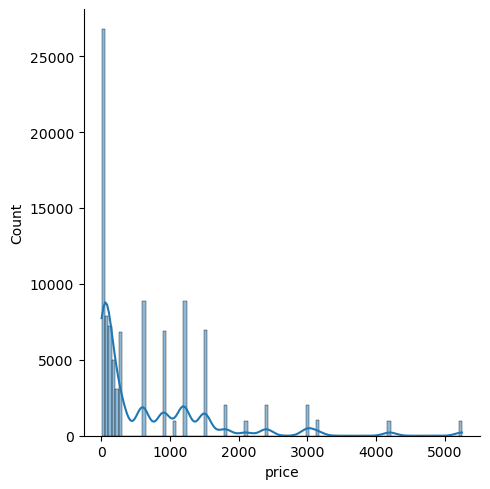

In [49]:
sns.displot(df['price'],kde=True)
plt.show()

* The percentage of shoping is high in between 0 to 500 price rate

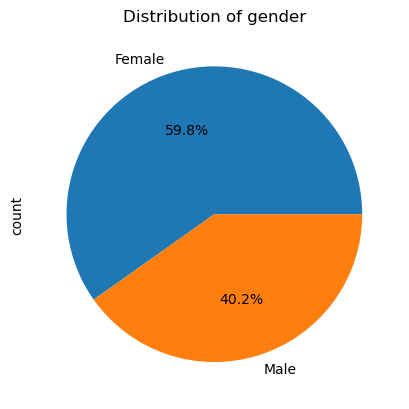

In [56]:
df.groupby('gender')['gender'].value_counts().plot.pie(autopct='%.1f%%')
plt.title('Distribution of gender')
plt.show()

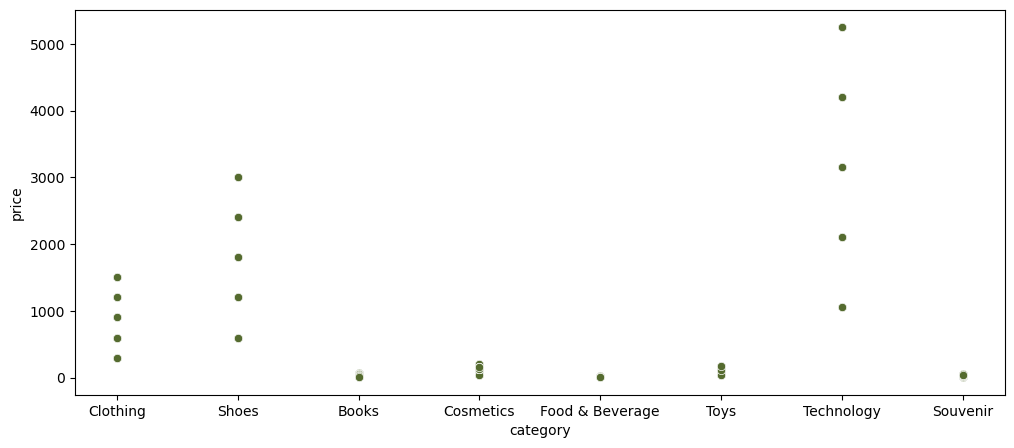

In [57]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df,y='price',x='category',color='darkolivegreen')
plt.show()

* when i compare different categories with price values the result came to be high for technology and shoes
* low for books,food&revenge and Souvnir


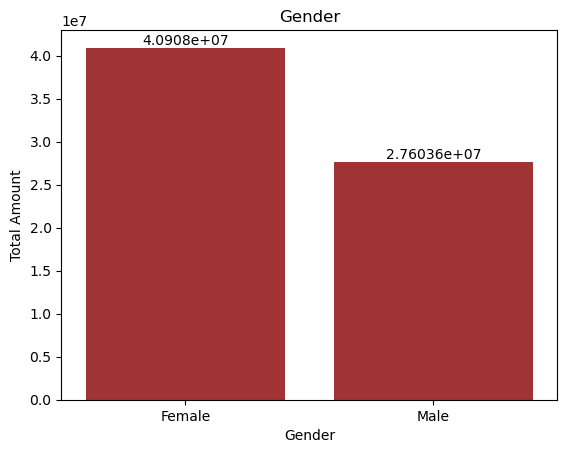

In [60]:
gen_amount = df.groupby(['gender'], as_index=False)['price'].sum().sort_values(by='price', ascending=False)
# Creating the bar plot
ax = sns.barplot(data=gen_amount, x='gender', y='price', color='firebrick')
# Adding labels to the bars
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.show()

* maximum number of shoping done by females
* the female spend much money as they have done maximum number of shoping


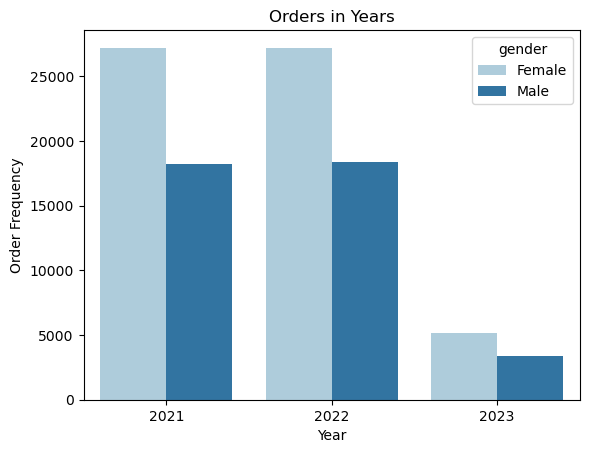

In [61]:
sns.countplot(data=df,x='year',hue='gender',palette='Paired')
plt.xlabel('Year')
plt.ylabel('Order Frequency')
plt.title('Orders in Years')
plt.show()

* the order frequency of the year 2021 and 2022 are equal
* the data of the year 2023 is slightly missing


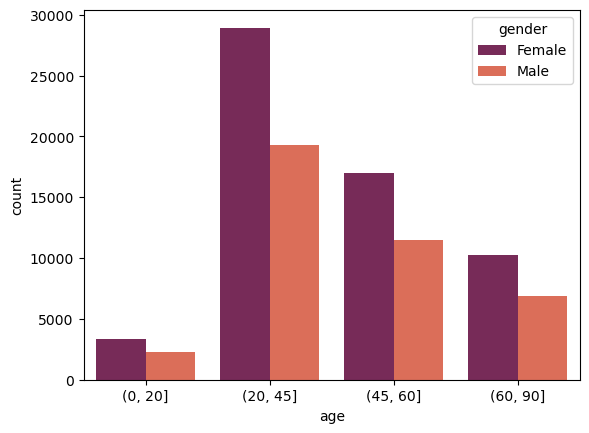

In [63]:
age_Group=pd.cut(df['age'],bins=[0,20,45,60,90])
sns.countplot(data=df,x=age_Group,hue='gender',palette='rocket')
plt.show()

* when we analyze with age group the mostly shopping is done in between the age of 20
  to 45, which shows that the shopping is mostly done by the adults
* and next high range of shopping is done by the age of 45 to 60


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x700 with 0 Axes>

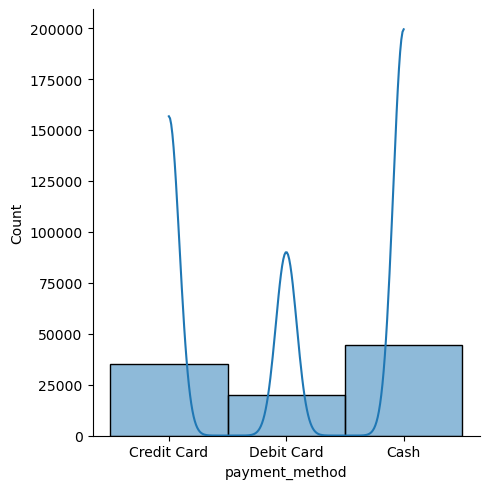

In [65]:
pm=df.payment_method.value_counts().plot
plt.figure(figsize=(15,7))
sns.displot(df,x='payment_method',kde=True)
plt.show()

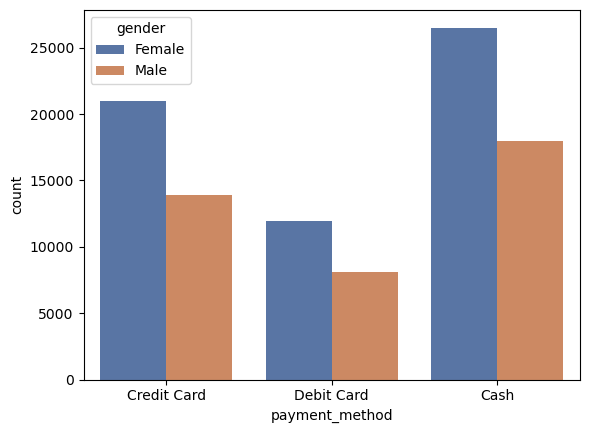

In [66]:
sns.countplot(df,x='payment_method',hue='gender',palette='deep')
plt.show()

* Most of the people has done their Payments through Cash and after that the second
high range is for credit card.
* very least people is doing there payment through debit card


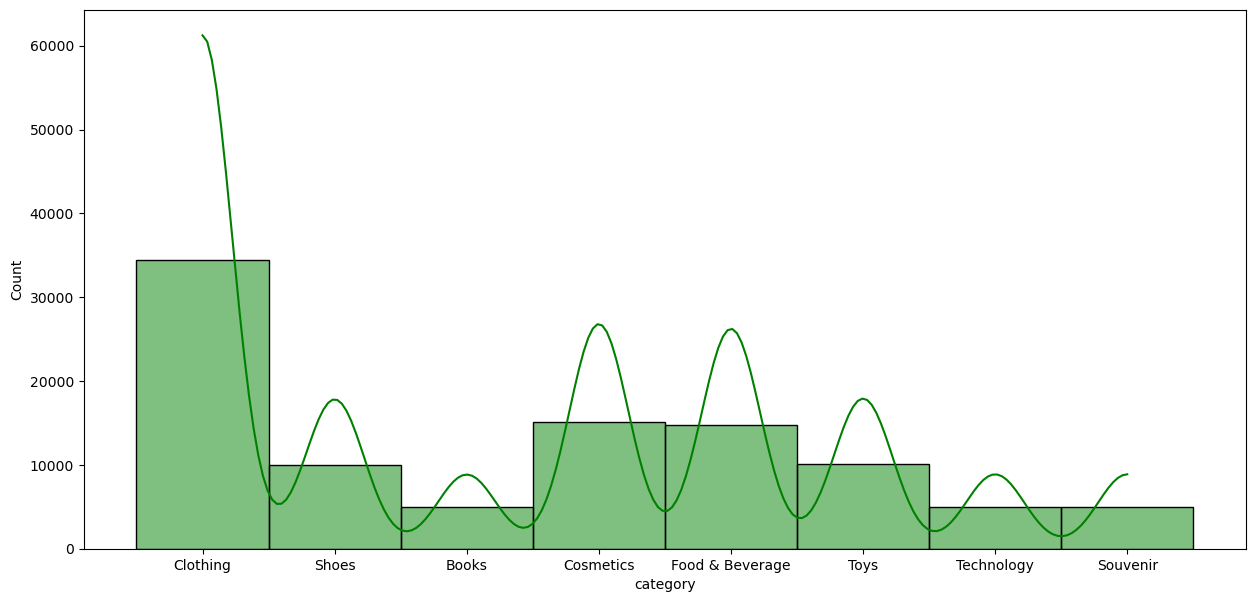

In [67]:
plt.figure(figsize=(15,7))
sns.histplot(x =df['category'],kde=True,color='green')
plt.show()

* clothing,cosmetics and food & beverage has high sale rather than other categories
* this categories is maybe higher because the female consumer rate is high

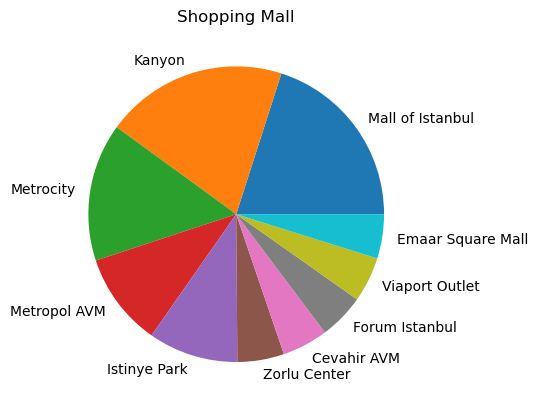

In [69]:
color=['darkorange','olive','darkgoldenrod','yellowgreen','chocolate',
df.shopping_mall.value_counts().plot.pie(ylabel='',title='Shopping Mall')]
plt.show()

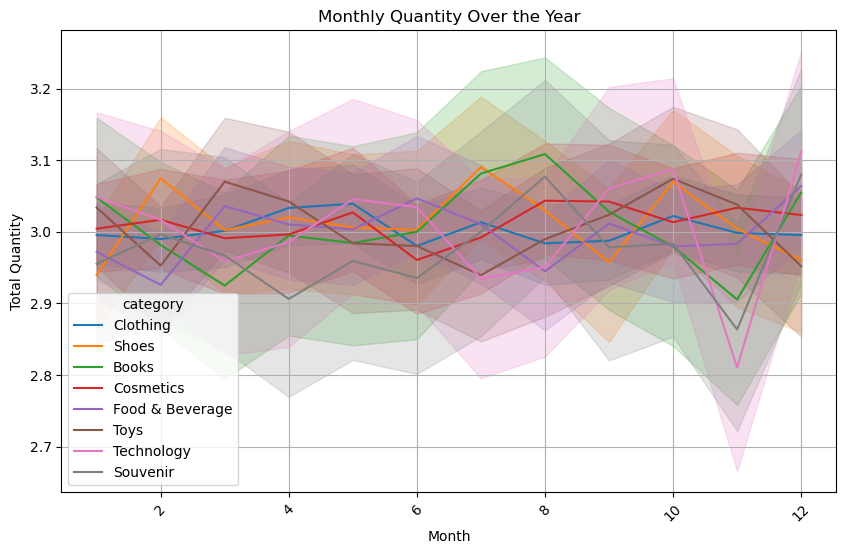

In [70]:
plt.figure(figsize=(10, 6))
# Use Seaborn's lineplot to differentiate by 'categories'
sns.lineplot(data=df, x='month', y='quantity', hue='category', )
plt.title("Monthly Quantity Over the Year")
plt.xlabel("Month")
plt.ylabel("Total Quantity")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

* The chart reveals the presence of seasonal trends in quantity for various categories.
Some categories may experience fluctuations in quantity that correspond to specific
months or seasons, which could be attributed to various factors like holidays, weather,
or consumer behavior.

# Conclusion


* In This Dataset The Most Shoping Has Done By Females.
* Most Of The People Has Purchased The Products Which is Low In Rate.
* The Data Of The Year 2023 Is Missing.
* Clothes Are Mostly Purchased By People.
